In [59]:
# SETTING THINGS UP
#------------------------------

# Dependencies and setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Configure Jupyter notebook to show all outputs from cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [60]:
# Import csvs
mouse_df=pd.read_csv("Resources/mouse_drug_data.csv")
trial_df=pd.read_csv("Resources/clinicaltrial_data.csv")

In [61]:
# Join the tables to create full dataframe
full_df=pd.merge(mouse_df, trial_df, on='Mouse ID', how='outer') # Perform outer join to make sure all rows are accounted for
full_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [62]:
# RUN TESTS ON FULL DATAFRAME TO MAKE SURE DATA IS CLEAN AND READY TO USE
#----------------------------------------------------------------------------

# Test dataframe data to make sure nothing weird is going on that I can't see.
# This cell will be fully commented out at the end.

# Test there are no NaN values in dataframe
# full_df.isnull().sum() # This returns 0 for all columns, so there are no NaN values

ValueError: err must be [ scalar | N, Nx1 or 2xN array-like ]

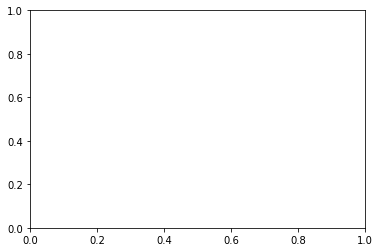

In [102]:
# SCATTERPLOT FOR TUMOR VOLUME VS. TIME 
#-----------------------------------------

    # Step 1: Filter the dataframe to only have rows using a specific drug
    # Step 2: Calculate sem (standard error of mean) of tumor volume size for the specific drug at each timepoint
    # Step 3: Plot the coordinate pairs (Timepoint, Tumor Volume (mm3)) on a scatter plot

# Step 1: Filter the dataframe to only have rows using a specific drug
drug_bool=full_df['Drug']=='Stelasyn' # Define boolean that is true if the value in the drug column matches specific drug
drug_df=full_df[drug_bool] # Define a new filtered dataframe based on this boolean

# Step 2: Calculate mean of tumor volume size for the specific drug at each timepoint
se_means=drug_df.groupby('Timepoint').sem()['Tumor Volume (mm3)'] # Create series indexed by timepoints with average tumor volumes as elements
se_means=se_means.values # Creates array based on series
#se_means=np.transpose(se_means) # Transposes array to be N x 1 instead of 1 x N
#se_means.shape

# Step 3: Plot the coordinate pairs (Timepoint, Tumor Volume (mm3)) on a scatter plot
plt.errorbar(drug_df['Timepoint'], drug_df['Tumor Volume (mm3)'], yerr=se_means, fmt='o')
plt.title('Stelasyn Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()